Train Accuracy: 0.80 ± 0.00
Validation Accuracy: 0.77 ± 0.01
Acurácia no conjunto de teste: 0.76
Matriz de Confusão:
[[3647  110   23]
 [ 774   68   12]
 [ 197   29    7]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.79      0.96      0.87      3780
           2       0.33      0.08      0.13       854
           3       0.17      0.03      0.05       233

    accuracy                           0.76      4867
   macro avg       0.43      0.36      0.35      4867
weighted avg       0.68      0.76      0.70      4867

Kappa: 0.08
Sensibilidade (Recall): [0.96481481 0.07962529 0.03004292]
Especificidade: [0.96481481 0.07962529 0.03004292]
Precisão (PPV): [0.78973582 0.32850242 0.16666667]
VPN: [0.78973582 0.32850242 0.16666667]
F1 Score: [0.86854013 0.12818096 0.05090909]
Precisão Balanceada: 0.36
Prevalência: 0.27
Taxa de Detecção: 0.36
Intervalo de Confiança (95%): (0.7528256880871839, 0.7766585938113163)


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1569: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1569: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


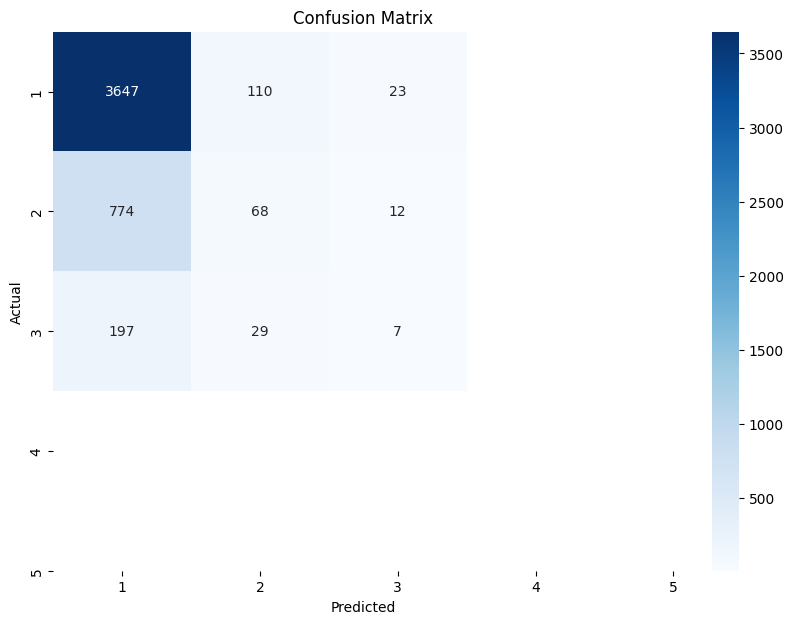

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, cohen_kappa_score,
                             precision_score, recall_score, f1_score, balanced_accuracy_score)
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Carregar o dataset
gnetDf = pd.read_csv("datasets/novo_Dados_Contextuais_Codificados.csv")

features = ['RP_001', 'RP_002', 'RP_010', 'RP_007', 'RP_008', 'RP_023', 'RP_005', 'RP_006', 
       'RP_009',  'RP_011', 'RP_012', 'RP_013',  'RP_015', 'RP_010', 'RP_018', 'RP_019', 'RP_014',
       'RP_016', 'RP_017',  'RP_020', 'RP_021', 'RP_022',
        'RP_024', 'RP_027', 'RP_028', 'RP_029', 'RP_030',
       'RP_031', 'RP_032', 'RP_033', 'RP_034', 'RP_035', 'RP_036', 'RP_037',
       'RP_038', 'RP_039', 'RP_040', 'RP_026', 'RP_041', 'RP_042', 'RP_043',
       'RP_044', 'RP_046', 'RP_045', 'RP_047', 'RP_049', 'RP_050', 'RP_048']

#   'RP_003',


target = 'RP_025'

# Selecionar features e variável alvo no DataFrame
data = gnetDf[features + [target]]

# Dividir os dados em conjunto de treino e teste (por exemplo, 90% treino, 10% teste)
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Separar features e variável alvo no conjunto de treino
X_train = train_data[features]
y_train = train_data[target]

# Separar features e variável alvo no conjunto de teste
X_test = test_data[features]
y_test = test_data[target]

# Padronizar os dados (importante para redes neurais)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), activation='relu', solver='adam', alpha=0.0001,
                    max_iter=1000, random_state=42)

# Treinar o modelo com validação cruzada
cv_results = cross_validate(mlp, X_train, y_train, cv=10, return_train_score=True)

# Exibir os resultados da validação cruzada
print(f"Train Accuracy: {cv_results['train_score'].mean():.2f} ± {cv_results['train_score'].std():.2f}")
print(f"Validation Accuracy: {cv_results['test_score'].mean():.2f} ± {cv_results['test_score'].std():.2f}")

# Treinar o modelo com todos os dados de treino
mlp.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = mlp.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

# Calcular e imprimir o relatório de classificação
# report = classification_report(y_test, y_pred, target_names=['1', '2', '3', '4', '5'])
report = classification_report(y_test, y_pred, target_names=['1', '2', '3'])
print('Relatório de Classificação:')
print(report)

# Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Kappa: {kappa:.2f}')

# Sensibilidade (Recall), Especificidade, Precisão (PPV), VPN
sensitivity = recall_score(y_test, y_pred, average=None)
specificity = recall_score(y_test, y_pred, pos_label=0, average=None)
precision = precision_score(y_test, y_pred, average=None)
npv = precision_score(y_test, y_pred, pos_label=0, average=None)
f1 = f1_score(y_test, y_pred, average=None)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Sensibilidade (Recall): {sensitivity}')
print(f'Especificidade: {specificity}')
print(f'Precisão (PPV): {precision}')
print(f'VPN: {npv}')
print(f'F1 Score: {f1}')
print(f'Precisão Balanceada: {balanced_accuracy:.2f}')

# Prevalência e Taxa de Detecção
prevalence = np.mean(y_test)
detection_rate = sensitivity.mean()
print(f'Prevalência: {prevalence:.2f}')
print(f'Taxa de Detecção: {detection_rate:.2f}')

# Intervalo de Confiança para Acurácia
n = len(y_test)
se = np.sqrt((accuracy * (1 - accuracy)) / n)
confidence_interval = stats.norm.interval(0.95, loc=accuracy, scale=se)
print(f'Intervalo de Confiança (95%): {confidence_interval}')

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Train Accuracy: 0.36 ± 0.00
Validation Accuracy: 0.31 ± 0.01
Acurácia no conjunto de teste: 0.32
Matriz de Confusão:
[[ 67  85 359  26 145   5]
 [ 61 140 428  21 136   4]
 [ 81 135 729  51 294  12]
 [ 28  49 365  34 265  14]
 [ 27  49 361  43 543  40]
 [  5   4  54  11 157  39]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.25      0.10      0.14       687
           2       0.30      0.18      0.22       790
           3       0.32      0.56      0.41      1302
           4       0.18      0.05      0.07       755
           5       0.35      0.51      0.42      1063
           6       0.34      0.14      0.20       270

    accuracy                           0.32      4867
   macro avg       0.29      0.26      0.24      4867
weighted avg       0.29      0.32      0.28      4867

Kappa: 0.12
Sensibilidade (Recall): [0.09752547 0.17721519 0.55990783 0.04503311 0.51081844 0.14444444]
Especificidade: [0.09752547 0.17721519 0.5599

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1569: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1569: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


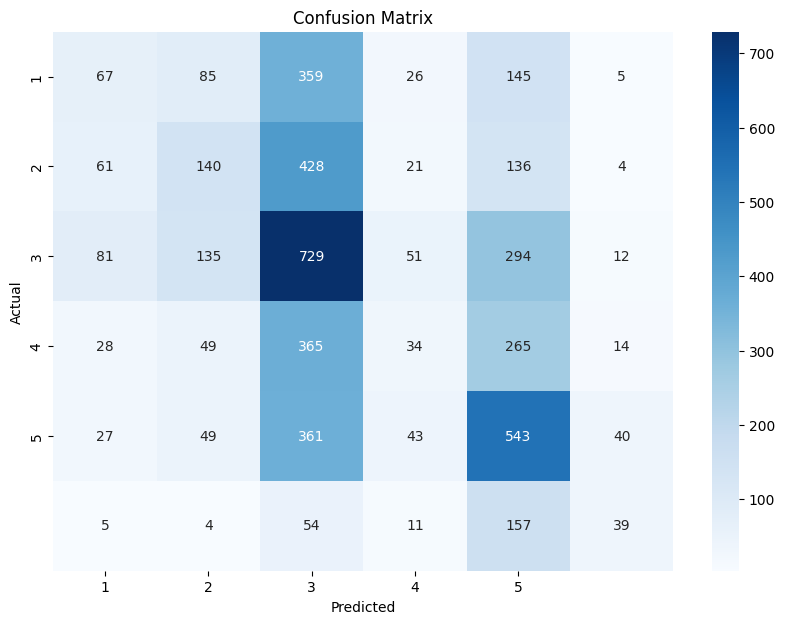

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, cohen_kappa_score,
                             precision_score, recall_score, f1_score, balanced_accuracy_score)
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Carregar o dataset
gnetDf = pd.read_csv("datasets/novo_Dados_Contextuais_Codificados.csv")



X = gnetDf[features]
y = gnetDf['RP_005']


# Selecionar as colunas de interesse
# Definir features e alvo
features = ['RP_001', 'RP_002', 'RP_003', 'RP_023', 'RP_007', 'RP_008',
       'RP_009',  'RP_011', 'RP_012', 'RP_013', 'RP_014', 'RP_015',
       'RP_016', 'RP_017', 'RP_018', 'RP_019', 'RP_020', 'RP_021', 'RP_022',
       'RP_010', 'RP_025', 'RP_027', 'RP_028', 'RP_029', 'RP_030',
       'RP_031', 'RP_032', 'RP_033', 'RP_034', 'RP_035', 'RP_036', 'RP_037',
       'RP_038', 'RP_039', 'RP_040', 'RP_026', 'RP_041', 'RP_042', 'RP_043',
       'RP_044', 'RP_046', 'RP_045', 'RP_047', 'RP_049', 'RP_050', 'RP_048']

# 'RP_006',  'RP_024',

target = 'RP_005'

# Selecionar features e variável alvo no DataFrame
data = gnetDf[features + [target]]

# Dividir os dados em conjunto de treino e teste (por exemplo, 90% treino, 10% teste)
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Separar features e variável alvo no conjunto de treino
X_train = train_data[features]
y_train = train_data[target]

# Separar features e variável alvo no conjunto de teste
X_test = test_data[features]
y_test = test_data[target]

# Padronizar os dados (importante para redes neurais)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), activation='relu', solver='adam', alpha=0.0001,
                    max_iter=1000, random_state=42)

# Treinar o modelo com validação cruzada
cv_results = cross_validate(mlp, X_train, y_train, cv=10, return_train_score=True)

# Exibir os resultados da validação cruzada
print(f"Train Accuracy: {cv_results['train_score'].mean():.2f} ± {cv_results['train_score'].std():.2f}")
print(f"Validation Accuracy: {cv_results['test_score'].mean():.2f} ± {cv_results['test_score'].std():.2f}")

# Treinar o modelo com todos os dados de treino
mlp.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = mlp.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

# Calcular e imprimir o relatório de classificação
# report = classification_report(y_test, y_pred, target_names=['1', '2', '3', '4', '5'])
report = classification_report(y_test, y_pred, target_names=['1', '2', '3', '4', '5', '6'])
print('Relatório de Classificação:')
print(report)

# Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Kappa: {kappa:.2f}')

# Sensibilidade (Recall), Especificidade, Precisão (PPV), VPN
sensitivity = recall_score(y_test, y_pred, average=None)
specificity = recall_score(y_test, y_pred, pos_label=0, average=None)
precision = precision_score(y_test, y_pred, average=None)
npv = precision_score(y_test, y_pred, pos_label=0, average=None)
f1 = f1_score(y_test, y_pred, average=None)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Sensibilidade (Recall): {sensitivity}')
print(f'Especificidade: {specificity}')
print(f'Precisão (PPV): {precision}')
print(f'VPN: {npv}')
print(f'F1 Score: {f1}')
print(f'Precisão Balanceada: {balanced_accuracy:.2f}')

# Prevalência e Taxa de Detecção
prevalence = np.mean(y_test)
detection_rate = sensitivity.mean()
print(f'Prevalência: {prevalence:.2f}')
print(f'Taxa de Detecção: {detection_rate:.2f}')

# Intervalo de Confiança para Acurácia
n = len(y_test)
se = np.sqrt((accuracy * (1 - accuracy)) / n)
confidence_interval = stats.norm.interval(0.95, loc=accuracy, scale=se)
print(f'Intervalo de Confiança (95%): {confidence_interval}')

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()